In [25]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data_dir = Path('../data').resolve()
data_dir.exists()

True

In [9]:
df = pd.read_csv(data_dir/'train.csv', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Section

In [10]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [11]:
df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

Only normal sales in low-density residential areas are selected.

In [12]:
df = df[df['MSZoning'] == 'RL']
df = df[df['SaleCondition'] == 'Normal']

# Exploratory Analysis

In [15]:
df['SalePrice']

Id
1       208500
2       181500
3       223500
5       250000
6       143000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 955, dtype: int64

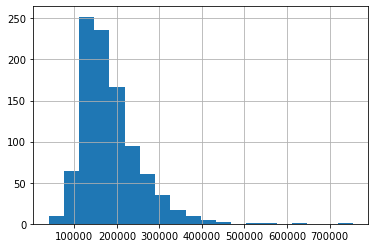

In [21]:
df['SalePrice'].hist(bins=20)

plt.show()

In [23]:
df['SalePrice'].describe()

count       955.000000
mean     184429.540314
std       70203.515556
min       39300.000000
25%      137000.000000
50%      171750.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The target seems quite skewed, but very similar to a log-normal distribution.

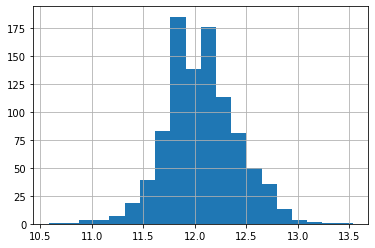

In [27]:
df['SalePrice'] = df['SalePrice'].apply(np.log)

df['SalePrice'].hist(bins=20)

plt.show()

In [28]:
df['SalePrice'].describe()

count    955.000000
mean      12.062711
std        0.348528
min       10.578980
25%       11.827736
50%       12.053795
75%       12.278393
max       13.534473
Name: SalePrice, dtype: float64

In [29]:
(df['SalePrice'] - df['SalePrice'].mean()).describe()

count    9.550000e+02
mean     2.114516e-14
std      3.485276e-01
min     -1.483731e+00
25%     -2.349746e-01
50%     -8.915636e-03
75%      2.156825e-01
max      1.471762e+00
Name: SalePrice, dtype: float64

Now the distribution looks very symmetric.